In [1]:
from python_files.import_libs import *
from python_files.predict import *
from python_files.test import *
from python_files.train import *

In [2]:
# Load data
model_df = pd.read_csv('data/model_df.csv')

In [3]:
data = model_df.drop(['sales','date'],axis=1)
train, test = data[0:-12].values, data[-12:].values

In [4]:
X_train, y_train, scaler = scale_data_train(train)
X_test, y_test = scale_data_test(test, scaler)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 12)
(35,)
(12, 12)
(12,)


RMSE: 187032.4100472518
MAE: 138391.25
R2 Score: 0.5816216659591951


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


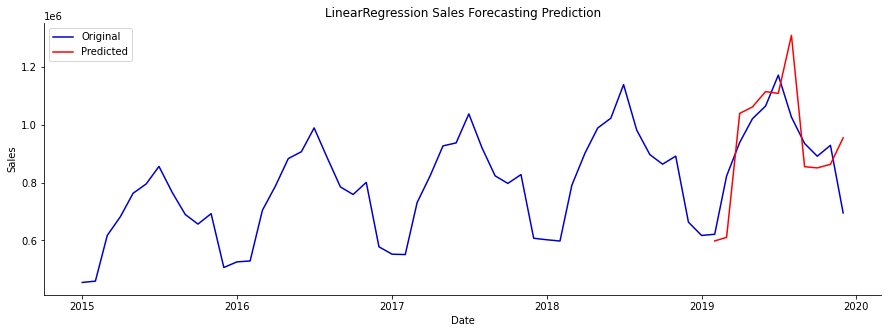

In [6]:
# Linear Regression
run_model(train, test, LinearRegression(), 'LinearRegression')

RMSE: 186173.13178441368
MAE: 130940.08333333333
R2 Score: 0.5854571250573628


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


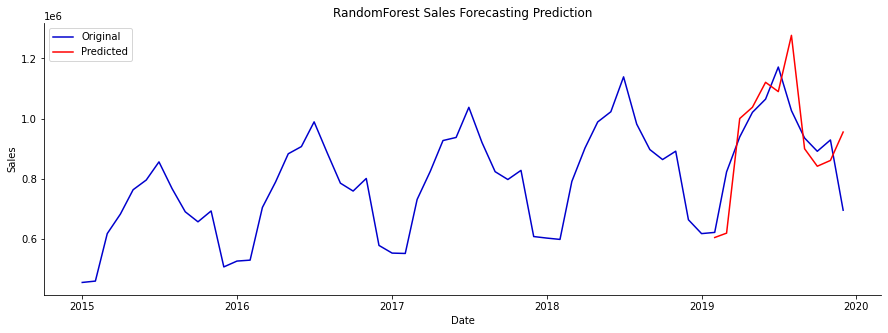

In [7]:
# Randon forest regressor
run_model(train, test, RandomForestRegressor(n_estimators=100, max_depth=20), 'RandomForest')

RMSE: 184133.83807007517
MAE: 132256.75
R2 Score: 0.5944889833089533


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


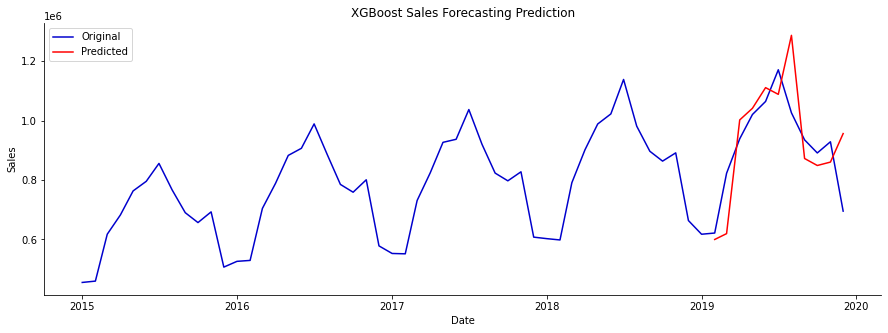

In [8]:
# XGBoost
run_model(train, test, XGBRegressor( n_estimators=100, 
                                    learning_rate=0.2, 
                                    objective='reg:squarederror'), 'XGBoost')

In [10]:
# LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
model.add(Dense(1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
predictions = model.predict(X_test,batch_size=1)
    
original_df = load_original_df()
unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
unscaled_df = predict_df(unscaled, original_df)
    
get_scores(unscaled_df, original_df, 'LSTM')
    
plot_results(unscaled_df, original_df, 'LSTM')

Epoch 1/200
35/35 [==============================] - 12s 1ms/step - loss: 0.2647
Epoch 2/200
35/35 [==============================] - 0s 941us/step - loss: 0.2598
Epoch 3/200
35/35 [==============================] - 0s 941us/step - loss: 0.2544
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2489
Epoch 5/200
35/35 [==============================] - 0s 912us/step - loss: 0.2427
Epoch 6/200
35/35 [==============================] - 0s 1000us/step - loss: 0.2356
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 0.2272
Epoch 8/200
35/35 [==============================] - 0s 971us/step - loss: 0.2174
Epoch 9/200
35/35 [==============================] - 0s 971us/step - loss: 0.2063
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.1939
Epoch 11/200
35/35 [==============================] - 0s 1ms/step - loss: 0.1805
Epoch 12/200
35/35 [==============================] - 0s 941us/step - loss: 0.1665
Epoch 13/200
35/35 [=

35/35 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 102/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 103/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 104/200
35/35 [==============================] - 0s 1000us/step - loss: 0.0033
Epoch 105/200
35/35 [==============================] - 0s 972us/step - loss: 0.0033
Epoch 106/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 107/200
35/35 [==============================] - 0s 1000us/step - loss: 0.0033
Epoch 108/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 109/200
35/35 [==============================] - 0s 941us/step - loss: 0.0032
Epoch 110/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 111/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 112/200
35/35 [==============================] - 0s 971us/step - loss: 0.0032
Epoch 113/200
35/3

35/35 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 200/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0015


NameError: name 'scaler_object' is not defined

In [11]:
pickle.dump(model_scores, open( "model_scores.p", "wb" ) )